This code will analyze the electricity price fluctuations in the power market on multiple scales. Wholesale data from Energinet is analyzed. This data is downloaded from https://www.energidataservice.dk/ Amount of electricity traded is not analyzed here as it contains ambiguity by including export and import (spot purchase and spot sale). Only the spot price from the day-ahead market is to be analszed. The unit is DKK per MWh.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math

In [47]:
file_name = '/Users/kabitrichattopadhyay/Documents/Data/Energy_Price/Energinet/WholeSaleMarket/Nordpool_Elbas_DK1.csv'
reader = pd.read_csv(file_name, sep=', ')
reader.dtypes

/Users/kabitrinag/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Year                    int64
Month                   int64
Date                    int64
Hr                      int64
SpotPurchase_MWhph    float64
SpotSell_MWhph        float64
SpotPrice_DKK         float64
ElbasAv_DKK           float64
ElbasMax_DKK          float64
ElbasMin_DKK          float64
dtype: object

Max of original price is :  14910.8
Min of original price is :  -462.84
Mean of original price is :  222.46262458926455


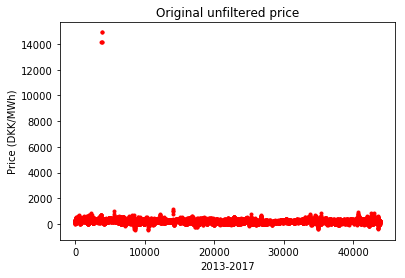

In [48]:
original_price = reader.SpotPrice_DKK

print('Max of original price is : ', np.max(original_price))
print('Min of original price is : ', np.min(original_price))
print('Mean of original price is : ', np.mean(original_price))

plt.figure(1)
plt.plot(original_price, 'r.')

plt.ylabel('Price (DKK/MWh)')
plt.xlabel('2013-2017')
plt.title('Original unfiltered price')

plt.show()

Clearly there are some outliers which should be removed before proceeding to the actual analysis.

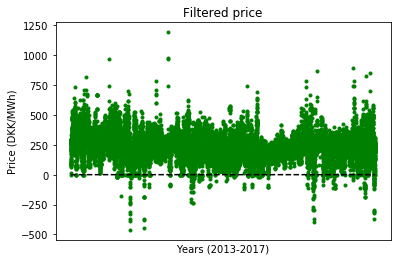

dtype('float64')

In [101]:
threshold = 12000

price = reader.SpotPrice_DKK

for i in np.arange(0, len(reader.SpotPrice_DKK)-1):   
    if (reader.SpotPrice_DKK[i] > threshold):
        price.loc[i] = np.nan

t = np.zeros(len(price))

plt.figure(2)
plt.plot(price, 'g.')
plt.plot(t, 'k--')

plt.tick_params(
    axis='x',          
    which='both',      
    bottom='off',      
    labelbottom='off')

plt.ylabel('Price (DKK/MWh)')
plt.xlabel('Years (2013-2017)')
plt.title('Filtered price')

plt.show()

price.dtype

Now separate out hourly values for each year to compare different years

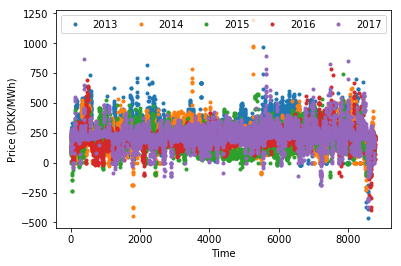

8760
8760
8760
8784
8760


In [158]:
years = [2013, 2014, 2015, 2016, 2017]

# This is a way of storing data for each year using a dictionary

count=0
dict_annual_price = {}

plt.figure(3)

for year in years:
    
    dict_annual_price["Annual_Price_" + str(year)] = price[reader.Year == year]
     
    t = np.arange(1, len(price[reader.Year == year])+1)
    t = np.transpose(t)
    
    plt.plot(t, price[reader.Year == year], '.', label=str(year))
    count += count

plt.legend(ncol=len(years), mode="expand")
plt.ylabel('Price (DKK/MWh)')
plt.xlabel('Time')
plt.show()

# This is another way of storing data for each year using a matrix

annual_vals = []

for y in np.arange(0, len(years)):
    nr_rows = len(reader.SpotPrice_DKK[reader.Year == years[y]])
    annual_vals.append([])
    
    for row in np.arange(0, nr_rows):
        annual_vals[y].append(price[reader.Year == years[y]])

print(len(annual_vals[0]))
print(len(annual_vals[1]))
print(len(annual_vals[2]))
print(len(annual_vals[3]))
print(len(annual_vals[4]))

# Histogram plots

#full_range=(price.min(), price.max())
n_bins=1000
plt.figure(4)
(annual_vals, n_bins, histtype='bar')

#count = 0

#plt.figure(4)

#for year in years:
    #n, bins, patches = plt.hist(annual_price[count])
    
    #print(n)
    #print(bins)
    #print(patches)
    
#plt.show()
#ax0 = axes.flatten()
#ax0.hist(annual_price, n_bins, density=True, histtype='bar')
#plt.show()

#plt.hist(annual_price[0], bins=n_bins, range=full_range, facecolor='g')
#n, bins, patches = plt.hist(annual_price[0], facecolor='b')
#plt.hist(annual_price[2], bins=n_bins, range=full_range, facecolor='r')
#plt.show()

#print(n)
#print(bins)

/Users/kabitrinag/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/kabitrinag/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


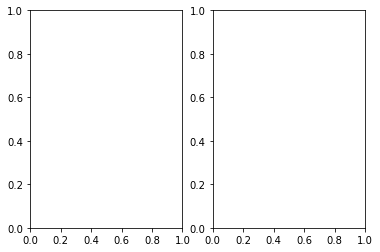

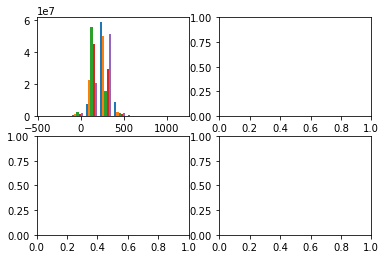

In [167]:
#dict_annual_price['Annual_Price_2016']
fig, axes = plt.subplots(nrows=2, ncols=2)
n_bins=10
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(annual_vals, n_bins, histtype='bar')
plt.show()

#fig, axes = plt.subplots(nrows=2, ncols=2)